In [1]:
import numpy as np
from numpy.linalg import norm
from numpy import array, zeros
import datetime
import matplotlib.pyplot as plt
import os
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plot
%matplotlib inline

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
"""
total_time = 0.
dt = 1e-11
v = np.array([100.,0.,0.])
B = np.array([0.,0.,5.e-4])
pos = [np.array([0.,0.,0.])]
list_pos=[]
list_vels=[]


q = 1.6*1e-19 #C
m = 9.31*1e-31
def calculate_acceleration(v):
    return q*np.cross(v,B)/m
    

while total_time<7e-8:
    vNplusHalf = v + 0.5*dt*calculate_acceleration(v)
    #print vNplusHalf
    pos = pos + dt*vNplusHalf
    v = vNplusHalf + 0.5*dt*calculate_acceleration(vNplusHalf)
    
    total_time += dt
    list_pos.append(pos)
    list_vels.append(v)
    
plt.plot(np.array(list_pos)[:,0][:,0],np.array(list_pos)[:,0][:,1])
plt.show()
"""

'\ntotal_time = 0.\ndt = 1e-11\nv = np.array([100.,0.,0.])\nB = np.array([0.,0.,5.e-4])\npos = [np.array([0.,0.,0.])]\nlist_pos=[]\nlist_vels=[]\n\n\nq = 1.6*1e-19 #C\nm = 9.31*1e-31\ndef calculate_acceleration(v):\n    return q*np.cross(v,B)/m\n    \n\nwhile total_time<7e-8:\n    vNplusHalf = v + 0.5*dt*calculate_acceleration(v)\n    #print vNplusHalf\n    pos = pos + dt*vNplusHalf\n    v = vNplusHalf + 0.5*dt*calculate_acceleration(vNplusHalf)\n    \n    total_time += dt\n    list_pos.append(pos)\n    list_vels.append(v)\n    \nplt.plot(np.array(list_pos)[:,0][:,0],np.array(list_pos)[:,0][:,1])\nplt.show()\n'

In [18]:
def simulate_el_trajec(total_time_of_simulation,v,pos,rho0,dt):

    total_time = 0.
    #dt = 1e-14
    #v = np.array([0.,100.,0.])
    #B = np.array([0.,0.,5.e-4])
    #pos = np.array([0.,50*1e-6,0.])
    list_pos=[]
    list_vels=[]
    list_times=[]
    list_elecField=[]
    list_bField=[]
    list_fZ=[]
    list_theta=[]
    list_accels=[]
    list_radius=[]
    list_kinEnergy=[]
    list_totEnergy=[]
    
    q = -1.6*1e-19 #C
    m = 9.31*1e-31
    ##### E calculation ####
    epsilon0 = 8.85*1e-12
    beta = 1.
    c = 3*1e8
    r0 = 200*1e-6
    ####B calculation ####
    mu0 = 4*np.pi*1e-7
    #rho0 = 1. #for gaussian profile
    #total_time_of_simulation = .8e-9
    sigma_r = 200.e-6
    def calculate_acceleration(v,pos1):

        #radial_distance = np.sqrt(((pos1)*(pos1)).sum())
        radial_distance = np.sqrt((pos[:2]**2).sum())

        exponential_term = np.exp(-1.*radial_distance*radial_distance/(2.*sigma_r*sigma_r))
        Eradial = (rho0/epsilon0)*(sigma_r*sigma_r/radial_distance)*(1. - exponential_term)

        #Btheta = radius*(mu0/(2*np.pi))
        Btheta = Eradial*beta/c

        theta = np.arctan2((pos1[1]),(pos1[0])) #in radians
        #print 'theta (deg): '+str(theta*np.pi/180)
        E = np.array([Eradial*np.cos(theta),Eradial*np.sin(theta),0.]) #Ex,Ey,Ez

        #############
        #Included signs in electric field
        signs_positions = np.sign(pos1)
        #############

        B = np.array([Btheta*np.sign(pos1[1]),-1.*Btheta*np.cos(theta),0.])

        acceleration = q*(E + np.cross(v,B))/m
        Fmag= q*np.cross(v,B)/m
        #print acceleration.shape
        return acceleration,B,E,Fmag,theta,radial_distance

    t0 = datetime.datetime.now()
    while total_time<total_time_of_simulation:
        #print 'total time :' + str(total_time)
        posNplusHalf = pos + 0.5*dt*v
        #print vNplusHalf
        a,B,E,Fmag,theta,rad = calculate_acceleration(v,posNplusHalf)
        v = v + dt*a
        pos = posNplusHalf + 0.5*dt*v
        gamma_calc = 1./np.sqrt(1 - ((np.sqrt((v[1:]**2).sum())/c)**2))
        kineticEnergy = (gamma_calc-1)*(.511)*1e6 #in eV
        totalEnergy = (gamma_calc)*(.511)*1e6 #in eV
        total_time += dt
        list_pos.append(pos)
        list_vels.append(v)
        list_times.append(total_time)
        list_elecField.append(E)
        list_bField.append(B)
        list_fZ.append(Fmag)
        list_theta.append(theta)
        list_accels.append(a)
        list_radius.append(rad)
        list_kinEnergy.append(kineticEnergy)
        list_totEnergy.append(totalEnergy)


    print 'total iterations: '+str(len(list_pos))
    print 'time elapsed: '+str(datetime.datetime.now()-t0)
    print 'investigate B field'
    
    return list_pos,list_vels,list_times,list_elecField,list_bField,list_fZ,list_theta,list_accels,list_radius,list_kinEnergy,list_totEnergy

# Calculate for Gauss density infinite cylinder case

In [113]:
def calculate_acceleration_new(v,pos1):

        q = -1.6*1e-19 #C
        m = 9.31*1e-31
        ##### E calculation ####
        epsilon0 = 8.85*1e-12
        beta = 1.
        c = 3*1e8
        r0 = 200*1e-6
        ####B calculation ####
        mu0 = 4*np.pi*1e-7
        #rho0 = 1. #for gaussian profile
        #total_time_of_simulation = .8e-9
        sigma_r = 200.e-6
    
        #radial_distance = np.sqrt(((pos1)*(pos1)).sum())
        radial_distance = np.sqrt((pos1[:2]**2).sum())

        exponential_term = np.exp(-1.*radial_distance*radial_distance/(2.*sigma_r*sigma_r))
        Eradial = (rho0/epsilon0)*(sigma_r*sigma_r/radial_distance)*(1. - exponential_term)

        #Btheta = radius*(mu0/(2*np.pi))
        Btheta = Eradial*beta/c

        theta = np.arctan2((pos1[1]),(pos1[0])) #in radians
        #print 'theta (deg): '+str(theta*np.pi/180)
        E = np.array([Eradial*np.cos(theta),Eradial*np.sin(theta),0.]) #Ex,Ey,Ez

        #############
        #Included signs in electric field
        signs_positions = np.sign(pos1)
        #############

        #B = np.array([Btheta*np.sign(pos1[1]),-1.*Btheta*np.cos(theta),0.])
        B = np.array([-1.*np.sin(theta)*Btheta,Btheta*np.cos(theta),0.])

        acceleration = q*(E + np.cross(v,B))/m
        Fmag= q*np.cross(v,B)/m
        #print acceleration.shape
        return acceleration,B,E,Fmag,theta,radial_distance

In [111]:
def simulate_el_trajec_new(total_time_of_simulation,v,pos,rho0,dt):

    total_time = 0.
    #dt = 1e-14
    #v = np.array([0.,100.,0.])
    #B = np.array([0.,0.,5.e-4])
    #pos = np.array([0.,50*1e-6,0.])
    list_pos=[]
    list_vels=[]
    list_times=[]
    list_elecField=[]
    list_bField=[]
    list_fZ=[]
    list_theta=[]
    list_accels=[]
    list_radius=[]
    list_kinEnergy=[]
    list_totEnergy=[]
    
    q = -1.6*1e-19 #C
    m = 9.31*1e-31
    ##### E calculation ####
    epsilon0 = 8.85*1e-12
    beta = 1.
    c = 3*1e8
    r0 = 200*1e-6
    ####B calculation ####
    mu0 = 4*np.pi*1e-7
    #rho0 = 1. #for gaussian profile
    #total_time_of_simulation = .8e-9
    sigma_r = 200.e-6
    

    t0 = datetime.datetime.now()
    while total_time<total_time_of_simulation:
        #print 'total time :' + str(total_time)
        #posNplusHalf = pos + 0.5*dt*v
        #print vNplusHalf
        #def rk4(x, v, a, dt):
        """Returns final (position, velocity) tuple after
        time dt has passed.
        x: initial position (number-like object)
        v: initial velocity (number-like object)
        a: acceleration function a(x,v,dt) (must be callable)
        dt: timestep (number)"""
        x1 = pos
        v1 = v
        a11,B,E,Fmag,theta,rad = calculate_acceleration_new(v1,x1)
        a1 = a11
        
        x2 = pos + 0.5*v1*dt
        v2 = v + 0.5*a1*dt
        a22,B,E,Fmag,theta,rad = calculate_acceleration_new(v2,x2)
        a2 = a22

        x3 = pos + 0.5*v2*dt
        v3 = v + 0.5*a2*dt
        a33,B,E,Fmag,theta,rad = calculate_acceleration_new(v3,x3)
        a3 = a33

        x4 = pos + v3*dt
        v4 = v + a3*dt
        a44,B,E,Fmag,theta,rad = calculate_acceleration_new(v4,x4)
        a4 = a44

        xf = pos + (dt/6.0)*(v1 + 2*v2 + 2*v3 + v4)
        vf = v + (dt/6.0)*(a1 + 2*a2 + 2*a3 + a4)
        #return xf, vf
        ##################
        #a,B,E,Fmag,theta,rad = calculate_acceleration(v,posNplusHalf)
        #v = v + dt*a
        #pos = posNplusHalf + 0.5*dt*v
        gamma_calc = 1./np.sqrt(1 - ((np.sqrt((v[1:]**2).sum())/c)**2))
        kineticEnergy = (gamma_calc-1)*(.511)*1e6 #in eV
        totalEnergy = (gamma_calc)*(.511)*1e6 #in eV
        total_time += dt
        #list_pos.append(pos)
        list_pos.append(xf)
        
        #list_vels.append(v)
        list_vels.append(vf)
        
        list_times.append(total_time)
        list_elecField.append(E)
        list_bField.append(B)
        list_fZ.append(Fmag)
        list_theta.append(theta)
        #list_accels.append(a)
        list_radius.append(rad)
        list_kinEnergy.append(kineticEnergy)
        list_totEnergy.append(totalEnergy)

        pos = xf
        v = vf

    print 'total iterations: '+str(len(list_pos))
    print 'time elapsed: '+str(datetime.datetime.now()-t0)
    print 'investigate B field'
    
    return list_pos,list_vels,list_times,list_elecField,list_bField,list_fZ,list_theta,list_accels,list_radius,list_kinEnergy,list_totEnergy


In [120]:
total_time_of_simulation=30*1e-9
#v = np.array([0.,5.934e6,0.])#1keV
v = np.array([0.,1.238e8,0.])#50keV 
pos=np.array([0.,150*1e-6,0.])
rho0=0.64
#dt=1.e-12
dt= total_time_of_simulation/10000.
list_pos,list_vels,list_times,list_elecField,list_bField,list_fZ,list_theta,list_accels,list_radius,list_kinetic,list_total = simulate_el_trajec_new(total_time_of_simulation,v,pos,rho0,dt)
######
#v1 = np.array([0.,1.874e7,0.])#10keV
#pos1=np.array([0.,10*1e-6,0.])
#list_posb,list_velsb,list_timesb,list_elecFieldb,list_bFieldb,list_fZb,list_thetab,list_accelsb,list_radiusb,list_kineticb,list_totalb = simulate_el_trajec(total_time_of_simulation,v1,pos1,rho0,dt)
##
#v2 = np.array([0.,1.238e8,0.])#50keV
#pos2=np.array([0.,10*1e-6,0.])
#list_posc,list_velsc,list_timesc,list_elecFieldc,list_bFieldc,list_fZc,list_thetac,list_accelsc,list_radiusc,list_kineticc,list_totalc = simulate_el_trajec(total_time_of_simulation,v2,pos2,rho0,dt)
##
#v3 = np.array([0.,1.645e8,0.])#100keV
#pos3=np.array([0.,10*1e-6,0.])
#list_posd,list_velsd,list_timesd,list_elecFieldd,list_bFieldd,list_fZd,list_thetad,list_accelsd,list_radiusd,list_kineticd,list_totald = simulate_el_trajec(total_time_of_simulation,v3,pos3,rho0,dt)


total iterations: 10000
time elapsed: 0:00:03.248965
investigate B field


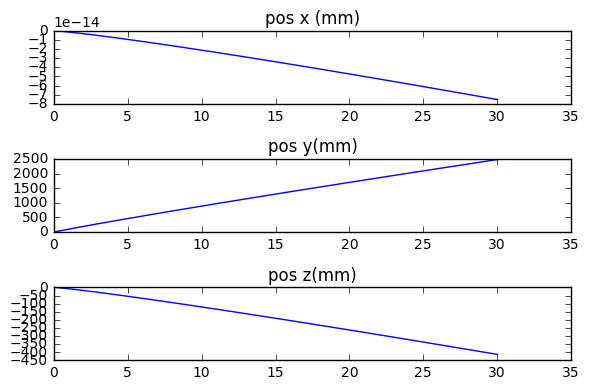

In [121]:
plt.figure(1)
plt.subplot(311)
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,0]*1e3)
plt.title('pos x (mm)')
plt.subplot(312)
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]*1e3)
plt.title('pos y(mm)')
plt.subplot(313)
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]*1e3)
plt.title('pos z(mm)')
plt.tight_layout()
plt.show()



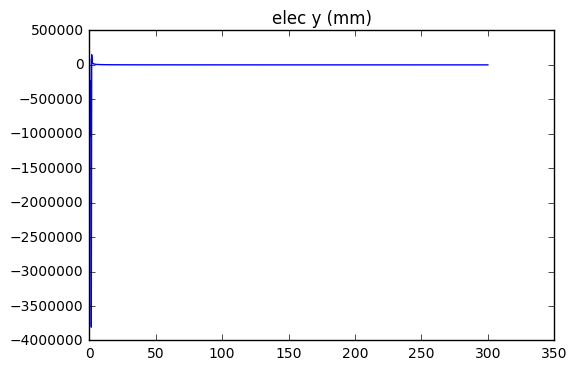

In [105]:
plt.figure(2)
plt.plot(np.array(list_times)*1e9,np.array(list_elecField)[:,1])
plt.title('elec y (mm)')
plt.show()

In [20]:
def calculate_beta_from_energy(kE):
    """
    E: kinectic energy in eV
    """
    gamma = (kE+.511*1e6)/(.511*1e6) #electron rest mass in eV
    beta = np.sqrt(1 - (1./(gamma*gamma)))
    return gamma,beta, "%.3e" % (beta*3.*1e8)

In [ ]:
for energy in (10,1e3,1e4,5e4,1e5,1e6,1e7,1e8):
    print 'energy (eV): '+str(energy)
    print calculate_beta_from_energy(energy)

# Store positions of electron as arrays

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


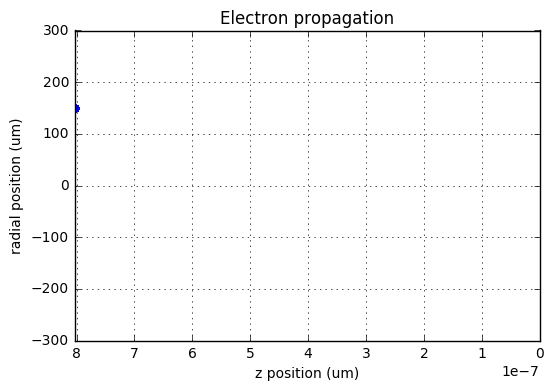

In [21]:
fig = plt.figure(1)
plt.grid()
limit = 100
num_imgs = 50
#for i,limit in enumerate(range(1,len(list_pos),len(list_pos)/num_imgs)):
y = np.array(list_pos)[:,1]*1e6
z = np.array(list_pos)[:,2]*1e6
plt.scatter(z[:limit],y[:limit],color='b')
#plt.scatter(np.linspace(-10,10,1000),np.zeros(len(np.linspace(-10,10,1000))),color='black')
plt.scatter(np.linspace(-100,100,1000),np.ones(len(np.linspace(-10,10,1000)))*-200,color='black')
plt.scatter(np.linspace(-100,100,1000),np.ones(len(np.linspace(-10,10,1000)))*200,color='black')
plt.xlim([z.min(),0.])
plt.ylim([-300.,300.])
plt.xlabel('z position (um)')
plt.ylabel('radial position (um)')
plt.title('Electron propagation')

fig.show()
#plt.savefig(os.getcwd()+'/images_movie_frog/img%05d.png' % (i))

#ax.scatter(x, y, z, c=c)

In [22]:
def return_xs_ys_zs(list_pos1,limit2,stepper):
    
    ys = np.array(list_pos1)[:,1]*1e6
    zs = np.array(list_pos1)[:,2]*1e6
    xs = np.array(list_pos1)[:,0]*1e6

    ys = ys[:limit2][::stepper]
    zs = zs[:limit2][::stepper]
    xs = xs[:limit2][::stepper]

    return xs,ys,zs

def return_maxy_from_pos(p):
    list_max=[]
    for i in p:
        #get max,min
        list_max.append(np.array(i)[:,1].max())
    
    max1 = max(list_max)
    return max1

def return_min_max_z_from_pos(p):
    list_max=[]
    list_min=[]
    for i in p:
        #get max,min
        list_max.append(np.array(i)[:,2].max())
        list_min.append(np.array(i)[:,2].min())
    max1 = max(list_max)
    min1 = min(list_max)
    return max1,min1

def calculate_energy_from_velocity(v1):
    
    """
    E: kinectic energy in eV
    """
    c1=3.e8
    gamma = 1./np.sqrt(1 - (v1/c1)**2)
    energy1 = (gamma+1.)*(.511)*1e6
    

    return "%.3e" % (energy1)

NameError: name 'list_posc' is not defined

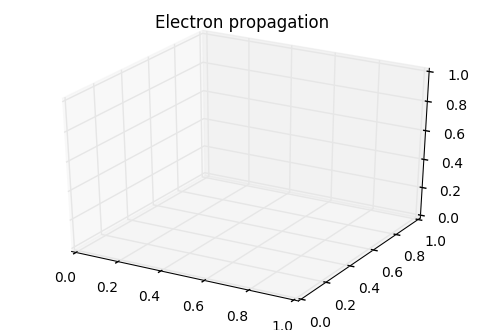

In [23]:
fig1 = plt.figure(2)
limit2 = 10000
num_imgs = 30
ax1 = fig1.add_subplot(111, projection='3d',)
box = ax1.get_position()
#ax1.set_position([box.x0, box.y0 + box.height * 0.1,
#                 box.width, box.height * 0.9])
plt.title('Electron propagation')
for i,limit2 in enumerate(range(1,len(list_pos),len(list_pos)/num_imgs)):

    #ys = np.array(list_pos)[:,1]*1e6
    #zs = np.array(list_pos)[:,2]*1e6
    #xs = np.array(list_pos)[:,0]*1e6

    #ys = ys[:limit2][::200]
    #zs = zs[:limit2][::200]
    #xs = xs[:limit2][::200]

    positionsA = return_xs_ys_zs(list_pos,limit2,1000)
    positionsB = return_xs_ys_zs(list_posb,limit2,1000)
    positionsC = return_xs_ys_zs(list_posc,limit2,1000)
    positionsD = return_xs_ys_zs(list_posd,limit2,1000)

    ax1.scatter(positionsA[0],positionsA[1],positionsA[2],c='blue',marker='o',label='teste')
    ax1.scatter(positionsB[0],positionsB[1],positionsB[2],c='red',marker='o',label='teste')
    ax1.scatter(positionsC[0],positionsC[1],positionsC[2],c='green',marker='o',label='teste')
    ax1.scatter(positionsD[0],positionsD[1],positionsD[2],c='yellow',marker='o',label='teste')

    #ax2 = ax1.twiny()
    #ax1.scatter(xsb,ysb,zsb,c='r',marker='o',label='teste1')
    #ax2.scatter(xsb,ysb,zsb,c='r',marker='o',label='teste1')

    #ax1.scatter(xs, ys, zs, c=c, marker=m)

    #ax1.set_xlabel('X Label')
    ax1.set_ylabel('R (um)')
    ax1.set_zlabel('Z (um)')

    #plt.zlim([z.min(),0.])
    #plt.ylim([-250.,250.])
    #plt.ylim([-1*max((np.array(list_posb)[:,1]*1e6).max(),(np.array(list_pos)[:,1]*1e6).max()),
    #         max((np.array(list_posb)[:,1]*1e6).max(),(np.array(list_pos)[:,1]*1e6).max())])

    #plt.ylim([-1*return_maxy_from_pos([list_pos,list_posb])*1e6,
    #         return_maxy_from_pos([list_pos,list_posb])*1e6])
    
    plt.ylim([-500.,500.])


    #ax1.set_zlim3d([min((np.array(list_pos)[:,2]*1e6).min(),(np.array(list_posb)[:,2]*1e6).min()),
    #max((np.array(list_posb)[:,2]*1e6).max(),(np.array(list_pos)[:,2]*1e6).max())])
    #ax1.set_zlim3d([return_min_max_z_from_pos([list_pos,list_posb,list_posc])[1]*1e6,
    #                return_min_max_z_from_pos([list_pos,list_posb,list_posc])[0]*1e6])
    maxz = 2e3
    ax1.set_zlim3d([-maxz,maxz])

    #turn off axis
    ax1.w_xaxis.line.set_lw(0.)
    ax1.set_xticks([])

    ax1.view_init(30, 0)
    plt.xlim([-1.,1.])

    # Shrink current axis's height by 10% on the bottom


    # Put a legend below current axis
    #legend
    colors = ['blue','red','green','yellow']
    scatter1_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
    scatter2_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'v')
    scatter3_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[2], marker = 'o')
    scatter4_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[3], marker = 'v')
    #ax1.legend([scatter1_proxy, scatter2_proxy], ['label1', 'label2'], numpoints = 1)
    ax1.legend([scatter1_proxy,scatter2_proxy,scatter3_proxy,scatter4_proxy],
               [r'$E = 1 keV$',r'$E = 10 keV$',r'$E = 50 keV$',r'$E = 100 keV$'],
               numpoints=1,loc='upper right')
              #bbox_to_anchor=(0.5,-0.05),fancybox=True,shadow=True,ncol=5)
    #[r'$r_0 = 50 \mu m$'],
    #ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)

    fig1.tight_layout()        
    plt.savefig(os.getcwd()+'/images_movie_frog/img%05d.png' % (i),dpi = 80,bbox_inches='tight')
    fig1.show()


##### print min((np.array(list_pos)[:,2]*1e6).min(),(np.array(list_pos100_1e7)[:,2]*1e6).min())
#print max((np.array(list_pos100_1e7)[:,2]*1e6).max(),(np.array(list_pos)[:,2]*1e6).max())
print max((np.array(list_posb)[:,1]*1e6).max(),(np.array(list_pos)[:,1]*1e6).max())

In [24]:
plt.plot(np.array(list_pos100_1e7)[:,2]*1e6)
plt.plot(np.array(list_pos100_1e7)[:,1]*1e6)
plt.show()

NameError: name 'list_pos100_1e7' is not defined

In [ ]:
plt.plot(np.array(list_pos)[:,2]*1e6)
plt.plot(np.array(list_pos)[:,1]*1e6)
plt.show()

In [ ]:
plt.plot(np.array(list_times)*1e9,np.array(list_fZ)[:,2],'r',label='f50')
plt.plot(np.array(list_times)*1e9,np.array(list_fZ100_1e7)[:,2],'black',label='f100')
plt.plot(np.array(list_times)*1e9,np.array(list_vels)[:,2]*1e11,'b',label='v50')
plt.plot(np.array(list_times)*1e9,np.array(list_vels100_1e7)[:,2]*1e11,'g',label='v100')
plt.xlim([0.,0.2])
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]*1e6,'g',label='z50')
plt.plot(np.array(list_times100_1e7)*1e9,np.array(list_pos100_1e7)[:,1]*1e6,'black',label='z100')
plt.show()

In [ ]:
calculate_energy_from_velocity(np.sqrt((list_velsb[0][2]**2).sum()))

In [ ]:
"""
def calculate_beta_from_energy(kE):
    
    E: kinectic energy in eV
    
    gamma = (kE+.511*1e6)/(.511*1e6) #electron rest mass in eV
    beta = np.sqrt(1 - (1./(gamma*gamma)))
    return gamma,beta, "%.3e" % (beta*3.*1e8)
"""    

In [ ]:
print calculate_beta_from_energy(10)#10eV
print calculate_beta_from_energy(100)#1keV
print calculate_beta_from_energy(1e4)#10keV
print calculate_beta_from_energy(1e5)#100kEv

In [ ]:
print 'kinectic energy conserved? total energy conserved?'
plt.plot(np.array(list_times)*1e9,np.array(list_kinetic)/1e6,label='kinectic',color='green')
plt.plot(np.array(list_times)*1e9,np.array(list_total)/1e6,label='total',color='red')
plt.ylabel('E (keV)')
plt.xlabel('time (ns)')
plt.legend()
plt.show()

In [ ]:
fig1 = plt.figure(2)
limit2 = 10000
num_imgs = 30
ax1 = fig1.add_subplot(111, projection='3d',)
box = ax1.get_position()
#ax1.set_position([box.x0, box.y0 + box.height * 0.1,
#                 box.width, box.height * 0.9])
plt.title('Electron propagation')
for i,limit2 in enumerate(range(1,len(list_pos),len(list_pos)/num_imgs)):

    #ys = np.array(list_pos)[:,1]*1e6
    #zs = np.array(list_pos)[:,2]*1e6
    #xs = np.array(list_pos)[:,0]*1e6

    #ys = ys[:limit2][::200]
    #zs = zs[:limit2][::200]
    #xs = xs[:limit2][::200]

    positionsA = return_xs_ys_zs(list_pos,limit2,200)
    positionsB = return_xs_ys_zs(list_posb,limit2,200)
    positionsC = return_xs_ys_zs(list_posc,limit2,200)
    positionsD = return_xs_ys_zs(list_posd,limit2,200)

    ax1.scatter(positionsA[0],positionsA[1],positionsA[2],c='blue',marker='o',label='teste')
    ax1.scatter(positionsB[0],positionsB[1],positionsB[2],c='red',marker='o',label='teste')
    ax1.scatter(positionsC[0],positionsC[1],positionsC[2],c='green',marker='o',label='teste')
    ax1.scatter(positionsD[0],positionsD[1],positionsD[2],c='yellow',marker='o',label='teste')

    #ax2 = ax1.twiny()
    #ax1.scatter(xsb,ysb,zsb,c='r',marker='o',label='teste1')
    #ax2.scatter(xsb,ysb,zsb,c='r',marker='o',label='teste1')

    #ax1.scatter(xs, ys, zs, c=c, marker=m)

    #ax1.set_xlabel('X Label')
    ax1.set_ylabel('R (um)')
    ax1.set_zlabel('Z (um)')

    #plt.zlim([z.min(),0.])
    #plt.ylim([-250.,250.])
    #plt.ylim([-1*max((np.array(list_posb)[:,1]*1e6).max(),(np.array(list_pos)[:,1]*1e6).max()),
    #         max((np.array(list_posb)[:,1]*1e6).max(),(np.array(list_pos)[:,1]*1e6).max())])

    plt.ylim([-1*return_maxy_from_pos([list_pos,list_posb,list_posc])*1e6,
             return_maxy_from_pos([list_pos,list_posb,list_posc])*1e6])



    #ax1.set_zlim3d([min((np.array(list_pos)[:,2]*1e6).min(),(np.array(list_posb)[:,2]*1e6).min()),
    #max((np.array(list_posb)[:,2]*1e6).max(),(np.array(list_pos)[:,2]*1e6).max())])
    ax1.set_zlim3d([return_min_max_z_from_pos([list_pos,list_posb,list_posc])[1]*1e6,
                    return_min_max_z_from_pos([list_pos,list_posb,list_posc])[0]*1e6])

    #turn off axis
    ax1.w_xaxis.line.set_lw(0.)
    ax1.set_xticks([])

    ax1.view_init(30, 0)
    plt.xlim([-1.,1.])

    # Shrink current axis's height by 10% on the bottom


    # Put a legend below current axis
    #legend
    colors = ['blue','red','green','yellow']
    scatter1_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
    scatter2_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'v')
    scatter3_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[2], marker = 'o')
    scatter4_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[3], marker = 'v')
    #ax1.legend([scatter1_proxy, scatter2_proxy], ['label1', 'label2'], numpoints = 1)
    ax1.legend([scatter1_proxy,scatter2_proxy,scatter3_proxy,scatter4_proxy],
               [r'$E = 10 eV$',r'$E = 1 keV$',r'$E = 10 keV$',r'$E = 100 keV$'],
               numpoints=1,loc='upper right')
              #bbox_to_anchor=(0.5,-0.05),fancybox=True,shadow=True,ncol=5)
    #[r'$r_0 = 50 \mu m$'],
    #ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)

    fig1.tight_layout()        
    plt.savefig(os.getcwd()+'/images_movie_frog/img%05d.png' % (i),dpi = 80,bbox_inches='tight')
    fig1.show()


In [ ]:
fig = plt.figure(4)
ax1 = plt.subplot(211)
plt.title('Electron trajectory - 1 keV')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]*1e6,'g',label='r')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]*1e6,'b',label='z')
plt.ylabel(r'$\mu m$')
plt.xlabel('time (ns)')
plt.legend()
##
ax2 = plt.subplot(212)
plt.plot(np.array(list_times)*1e9,np.array(list_kinetic),'r',label='kinetic energy')
#plt.scatter(np.array(list_times)[::1000]*1e9,np.array(list_kinetic)[::1000],color='r')

plt.legend()
plt.tight_layout()
plt.show()

In [98]:
np.sqrt((pos1[:2]**2).sum())

5.0

In [97]:
pos1=np.array([3.,4.,0.])